## 1. Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

## 2. Import Datasets

In [3]:
df = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A) .csv')

## 3. Sneak Peek to Our Datasets

In [4]:
df.dtypes

Timestamp        object
Type Burger      object
Code Burger       int64
Amount Burger     int64
Type Drink       object
Code Drink        int64
Amount Drink      int64
Gender            int64
Payment          object
dtype: object

In [5]:
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


In [7]:
df.describe()

,Code Burger,Amount Burger,Code Drink,Amount Drink,Gender
count,312.000000,312.00000,312.000000,312.000000,312.000000
mean,2.250000,6.25000,1.637821,3.913462,0.451923
std,1.173803,3.45969,1.045698,2.960981,0.498483
min,1.000000,1.00000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,2.000000,0.000000
50%,2.000000,6.00000,2.000000,3.000000,0.000000
75%,3.000000,9.00000,3.000000,5.000000,1.000000
max,4.000000,12.00000,3.000000,10.000000,1.000000


In [8]:
df.shape

(312, 9)

## 4. Handling Missing Values

In [9]:
df.isnull().sum() #tidak ada missing values pada data

Timestamp        0
Type Burger      0
Code Burger      0
Amount Burger    0
Type Drink       0
Code Drink       0
Amount Drink     0
Gender           0
Payment          0
dtype: int64

## 5. Labelling

1. Jadi kelompok kita akan menggunakan metode klasifikasi untuk menganalisis behaviour dari pelanggan burger star
2. Nanti akan dibagi ke dalam 3 kelas yaitu kelas A, B, C, dan D menurut quartile
3. Kelas D disini adalah orang yang termasuk kedalam kuartil 1 atau dibawah 25% berdasarkan jumlah pembelian burger dan drink
4. Kelas C disini adalah orang yang termasuk kedalam kuartil 2 atau diantara 25% sampai 50% berdasarkan jumlah pembelian burger dan drink
5. Kelas B disini adalah orang yang termasuk kedalam kuartil 3 atau diantara 50% sampai 75% berdasarkan jumlah pembelian burger dan drink
6. Kelas A disini adalah orang yang termasuk kedalam kuartil 4 diatas 75% berdasarkan jumlah pembelian burger dan drink

In [10]:
label = []
for i in range(len(df)):
    if (df['Amount Burger'][i] >= 9) and (df['Amount Drink'][i] >= 5):
        label.append('A')
    elif  6<= df['Amount Burger'][i] < 9 and 3<= df['Amount Drink'][i] < 5:
        label.append('B')
    elif  3<= df['Amount Burger'][i] < 6 and 2<= df['Amount Drink'][i] < 3:
        label.append('C')
    else:
        label.append('D')

In [11]:
df['label'] = label
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,label
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,B
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,A
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,A
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,A
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,D


In [12]:
df.groupby('label').size()

label
A     62
B     33
C     16
D    201
dtype: int64

## 6. Modelling

In [13]:
label_a = df[df['label']=='A']
label_a = label_a[['Amount Burger', 'Amount Drink','label']]
label_a.head()

,Amount Burger,Amount Drink,label
1,12,10,A
2,10,5,A
3,9,9,A
9,9,9,A
15,11,9,A


In [14]:
label_b = df[df['label']=='B']
label_b = label_b[['Amount Burger', 'Amount Drink','label']]
label_b.head()

,Amount Burger,Amount Drink,label
0,6,3,B
5,8,4,B
7,6,3,B
27,8,4,B
46,6,3,B


In [15]:
label_c = df[df['label']=='C']
label_c = label_c[['Amount Burger', 'Amount Drink','label']]
label_c.head()

,Amount Burger,Amount Drink,label
8,5,2,C
29,5,2,C
48,5,2,C
58,5,2,C
98,5,2,C


In [16]:
label_d = df[df['label']=='D']
label_d = label_d[['Amount Burger', 'Amount Drink','label']]
label_d.head()

,Amount Burger,Amount Drink,label
4,11,3,D
6,7,7,D
10,11,3,D
11,7,7,D
12,11,0,D


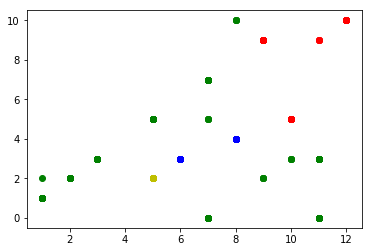

In [17]:
plt.plot(label_a['Amount Burger'], label_a['Amount Drink'], 'ro')
plt.plot(label_b['Amount Burger'], label_b['Amount Drink'], 'bo')
plt.plot(label_c['Amount Burger'], label_c['Amount Drink'], 'yo')
plt.plot(label_d['Amount Burger'], label_d['Amount Drink'], 'go')

In [18]:
x = df[['Amount Burger', 'Amount Drink']]
x.head()

,Amount Burger,Amount Drink
0,6,3
1,12,10
2,10,5
3,9,9
4,11,3


In [19]:
y = df['label']
y.head()

0    B
1    A
2    A
3    A
4    D
Name: label, dtype: object

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(249, 2)
(63, 2)
(249,)
(63,)


Mencari nilai k yang maksimal dengan melihat test accuracynya

In [22]:
k_range = range(1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9841269841269841, 0.9682539682539683, 0.9682539682539683, 0.9682539682539683, 0.9682539682539683, 0.9682539682539683, 0.9682539682539683, 0.9682539682539683, 1.0, 0.9206349206349206, 0.9206349206349206, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8095238095238095, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8412698412698413, 0.8888888888888888, 0.8412698412698413, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095]


Text(0,0.5,'Testing Accuracy')

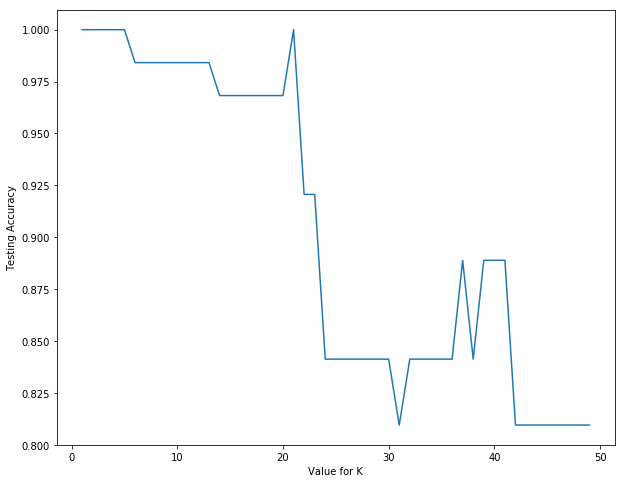

In [23]:
plt.figure(figsize=(10,8))
plt.plot(k_range, scores)
plt.xlabel('Value for K')
plt.ylabel('Testing Accuracy')

Dapat dilihat bahwa nilai k dari 1-5 mendapatkan akurasi sebesar 1. takutnya jika pakai nilai k yang akurasinya 1 bisa jadi overfit, maka kita memutuskan untuk menggunakan k=7

In [24]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

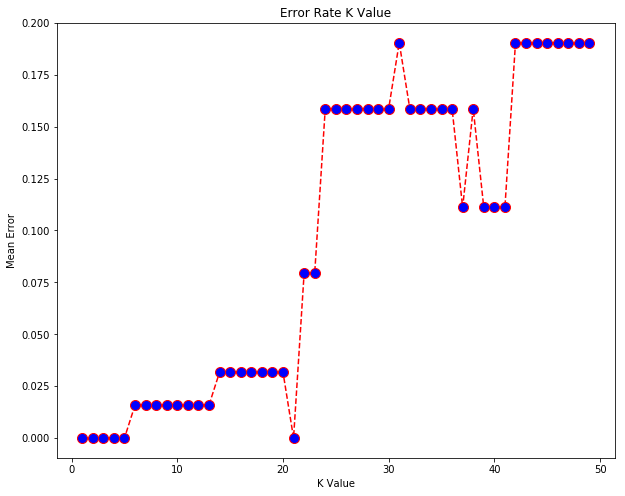

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [44]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [45]:
knn_5.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

coba kita menggunakan data x_test dan y_test untuk prediksi dan lihat perbedaanya

In [46]:
y_pred = knn_5.predict(x_test)
y_pred

array(['A', 'D', 'A', 'C', 'A', 'B', 'A', 'D', 'B', 'D', 'B', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'C', 'D', 'B', 'D', 'D', 'B', 'A', 'A',
       'D', 'C', 'C', 'B', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'D',
       'D', 'D', 'A', 'D', 'D', 'D', 'D', 'C', 'D', 'B', 'D', 'D', 'D',
       'A', 'A', 'D', 'A', 'B', 'D', 'D', 'D', 'D', 'A', 'D'],
      dtype=object)

In [47]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          A       1.00      1.00      1.00        13
          B       1.00      1.00      1.00         8
          C       1.00      1.00      1.00         5
          D       1.00      1.00      1.00        37

avg / total       1.00      1.00      1.00        63



In [30]:
komparasi = y_test.reset_index()
komparasi.drop(columns='index', inplace=True)

In [31]:
komparasi['prediksi'] = y_pred
komparasi.rename(columns={
    'label':'reality'
}, inplace=True)

In [32]:
komparasi.head()

,reality,prediksi
0,A,A
1,D,D
2,A,A
3,C,C
4,A,A


In [33]:
for i in range(len(komparasi)):
    if komparasi['reality'][i] != komparasi['prediksi'][i]:
        print(i) #didapatkan bahwa tidak ada string yang di print maka data reality dan prediksi sudah sesuai semua

## 7. Hasil dan Analisis Lanjut

1. menggunakan metode klasifikasi KNN
2. k yang digunakan adalah 7 dengan tingkat akurasi sebesar 0.98

In [34]:
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,label
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,B
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,A
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,A
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,A
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,D


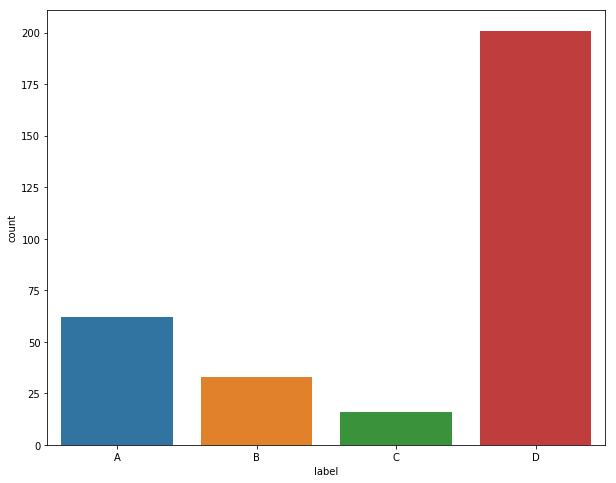

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(df['label'].sort_values()) #0==Female and 1=Male

1. Dapat dilihat dari gambar bahwa gender wanita lebih banyak di kelas A daripada lelaki dimana dapat diartikan wanita lebih banyak membeli makanan. dan Lelaki banyak sekali di kelas D yaitu yang membeli makanan sedikit.
2. mungkin juga karena nature seorang wanita ketika makan datang secara bergerombol jadi membeli makanan lebih banyak dan laki-laki merasa tidak masalah jika makan sendiri

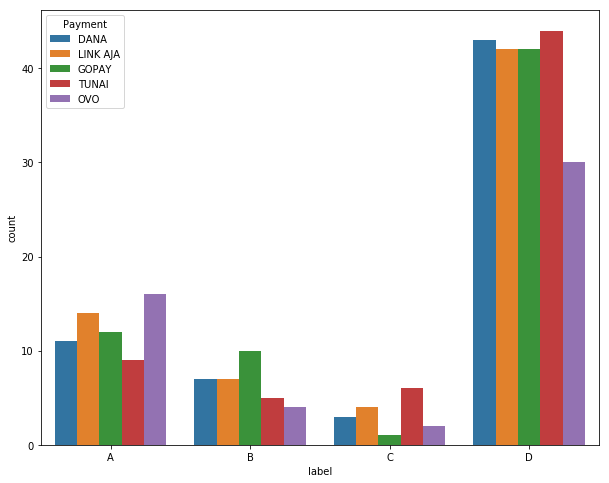

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(df['label'].sort_values(), hue=df['Payment'])

In [37]:
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,label
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,B
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,A
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,A
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,A
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,D


In [38]:
df['Timestamp'] = df['Timestamp'].replace(r':\d\d','',regex=True)
df['Timestamp'] = df['Timestamp'].astype('int64')

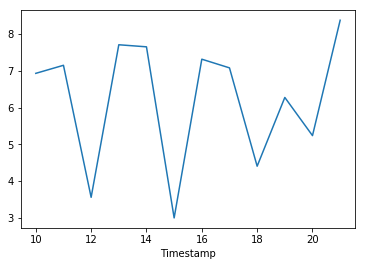

In [39]:
df.groupby('Timestamp')['Amount Burger'].mean().plot()

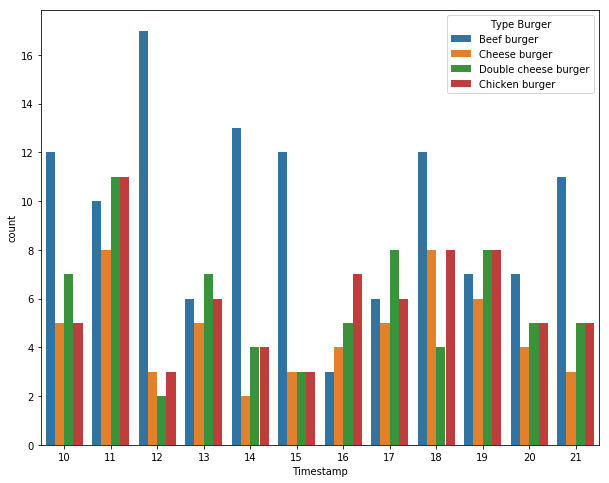

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(df['Timestamp'], hue=df['Type Burger'])

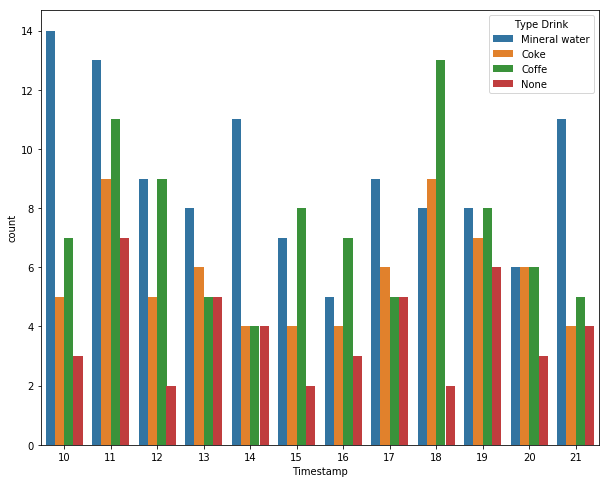

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(df['Timestamp'], hue=df['Type Drink'])

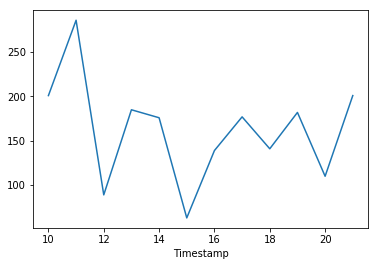

In [42]:
df.groupby('Timestamp')['Amount Burger'].sum().plot()

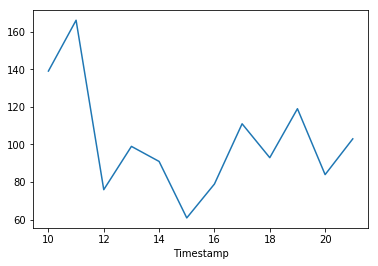

In [43]:
df.groupby('Timestamp')['Amount Drink'].sum().plot()